# 8.3.1 Detección de novedades

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.font_manager
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import OneClassSVM

import warnings
warnings.filterwarnings("ignore")

Link: https://youtu.be/B6OIHwUe4Xo?si=WhhPTdGg5cpB5iw3

Links: https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

## 8.3.1.1 Definición del problema

Se desea detectar cuando una nueva observación es un outlier. El dataset de entrenamiento no contiene outliers. Esta es una forma de detección de anomalías semi-supervizada.

Las anomalias pueden formar un cluster denso en una región de baja probabilidad del conjunto de entrenamiento.

En las implementaciones, el +1 indica un inlier, y el -1 un outlier.

## 8.3.1.2 Proceso

El dataset de entrenamiento contiene $n$ observaciones con $p$ caracaterísticas.

Llega una nueva observación desconocida hasta ahora.

La nueva observación pertenece a la misma distibución de probabilidades del datset de entrenamiento?

'         Errors train: 19/200'

' Errors novel regular: 5/40'

'Errors novel abnormal: 2/40'

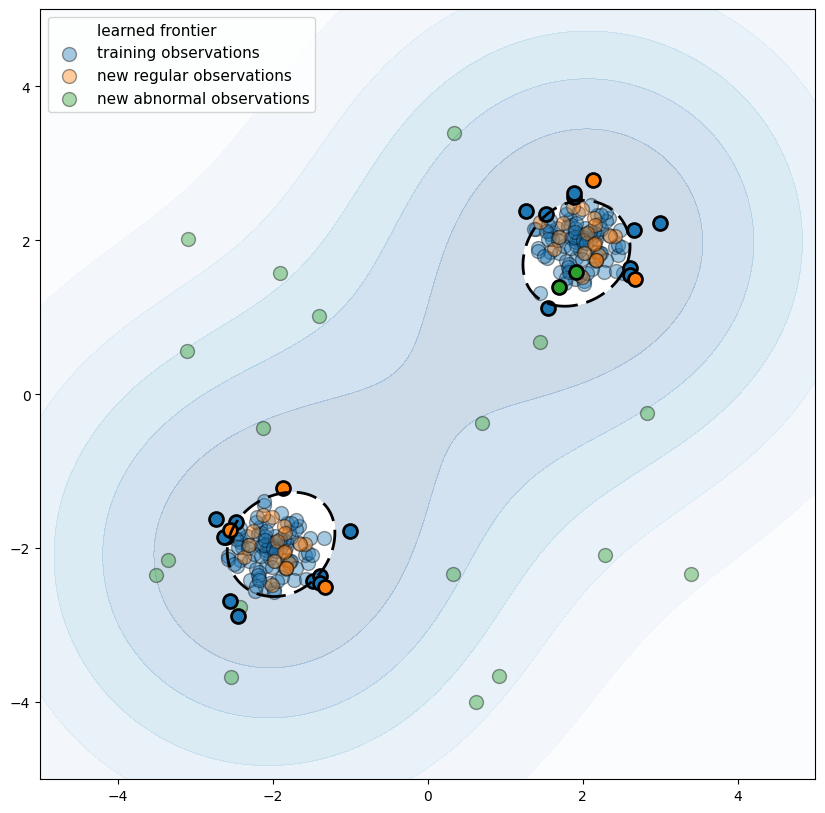

In [3]:
#
# Conjunto de datos de entrenamiento
#
np.random.seed(122)

X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

#
# Conjunto de datos de prueba
#
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]


#
# Outliers
#
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

#
# Especificación y entrenamiento del modelo
#
clf = OneClassSVM(
    # -----------------------------------------------------
    # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
    kernel="rbf",
    # -----------------------------------------------------
    # An upper bound on the fraction of training errors and
    # a lower bound of the fraction of support vectors.
    nu=0.1,
    # -----------------------------------------------------
    # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    gamma=0.1,
)
clf.fit(X_train)

#
# Pronóstico
#
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

#
# Número de outliers.
#   n_error_train: puntos en el conjunto de entrenamiento
#     considerados erróneamente como outliers
#   n_error_test: puntos en el conjunto de prueba
#      consieradores erróneamente como outliers
#   n_error_outliers: outliers considerados erróneamente
#      como inliers
#
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

display(
    "         Errors train: {:d}/200".format(n_error_train),
    " Errors novel regular: {:d}/40".format(n_error_test),
    "Errors novel abnormal: {:d}/40".format(n_error_outliers),
)


X_error_train = X_train[y_pred_train == -1, :]
X_error_test = X_test[y_pred_test == -1, :]
X_error_outliers = X_outliers[y_pred_outliers == 1, :]

#
# Grafica el área con las regiones de probabilidad
# Z es una matriz que contiene la probabilidad de
# la presencia de una nueva observación en ese punto
#
xx, yy = np.meshgrid(
    np.linspace(-5, 5, 500),
    np.linspace(-5, 5, 500),
)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#
# Superficie
#
plt.figure(figsize=(10, 10))
plt.contourf(
    xx,
    yy,
    Z,
    levels=np.linspace(Z.min(), 0, 7),
    cmap=plt.cm.Blues,
    alpha=0.2,
)

#
# Frontera de decisión
#
a = plt.contour(
    xx,
    yy,
    Z,
    levels=[0],
    linewidths=2,
    colors="black",
    alpha=1,
    linestyles="--",
)

#
# Area contenida en la frontera de decisión
#
plt.contourf(
    xx,
    yy,
    Z,
    levels=[0, Z.max()],
    colors="white",
    alpha=1.0,
)

#
# Patrones de entrenamiento, prueba y outliers
#
s = 100
b1 = plt.scatter(
    X_train[:, 0], X_train[:, 1], c="tab:blue", s=s, edgecolors="k", alpha=0.4
)
b2 = plt.scatter(
    X_test[:, 0], X_test[:, 1], c="tab:orange", s=s, edgecolors="k", alpha=0.4
)
c = plt.scatter(
    X_outliers[:, 0], X_outliers[:, 1], c="tab:green", s=s, edgecolors="k", alpha=0.4
)

plt.scatter(
    X_error_train[:, 0],
    X_error_train[:, 1],
    c="tab:blue",
    s=s,
    edgecolors="k",
    linewidths=2,
)
plt.scatter(
    X_error_test[:, 0],
    X_error_test[:, 1],
    c="tab:orange",
    s=s,
    edgecolors="k",
    linewidths=2,
)
plt.scatter(
    X_error_outliers[:, 0],
    X_error_outliers[:, 1],
    c="tab:green",
    s=s,
    edgecolors="k",
    linewidths=2,
)

#
# Estetica de la gráfica
#
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)

plt.show()

In [4]:
print('ok_')

ok_
